<div align='center'>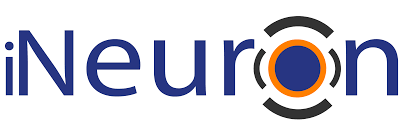</div>

<br>

<div align='center'><img src='https://climate.nasa.gov/system/news_items/main_images/2293_climateprojection_768_80.jpg'></div>

# **Analyzing Climate Change - EDA**

<br>

**Problem Statement:** Analyze the change in temperatures across globe from the 17th century till now.
<br>

This Exploratory Data Analysis contains, 
1) Load and Show Dataset <br>
2) Missing Values Imputation<br>
3) Lag Plot and Analysis<br>
4) ACF or Autocorrelation plots and Analysis<br>
5) Trend Plot and Analysis<br>
6) Seasonal Plot and Analysis<br>
7) Chloropleth Map of Average Temperature by Countries and Analysis<br>


**Data :** Here for the Above list of analysis, I have used a dataset contains Global Land Average Temperature Per Month from 1750 to 2015.

<br><br><br>

### Load and Show Dataset

In [1]:
# Import Basic Libraries, Pandas, NumPy and Plotly Express
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# Read the csv file and load it as Pandas DataFrame 
print('Loading Dataset.........')
df = pd.read_csv('datasets/GlobalTemperatures.csv',parse_dates=['dt'],index_col='dt')
df = df[['LandAverageTemperature']]
df.columns = ['AverageTemperature']
print('Dataset Loaded Successfully.')

Loading Dataset.........
Dataset Loaded Successfully.


#### First 5 Records of Global Land Average Temperature ( 1750 - 2015 )

In [3]:
df.head()

,AverageTemperature
dt,
1750-01-01,3.034
1750-02-01,3.083
1750-03-01,5.626
1750-04-01,8.490
1750-05-01,11.573


#### Last 5 Records of Global Land Average Temperature ( 1750 - 2015 )

In [4]:
df.tail()

,AverageTemperature
dt,
2015-08-01,14.755
2015-09-01,12.999
2015-10-01,10.801
2015-11-01,7.433
2015-12-01,5.518


<br><br><br>

 ### Missing Values Imputation :

<strong> Strategy :</strong> Impute missing Values with Seasonal (Monthly) mean

In [5]:
print('Number of Missing Values before imputation :',int(df.isnull().sum()))
# I impute missing Values with Seasonal (Monthly) mean
print('Imputing missing Values.......................')
monthly_mean = df['AverageTemperature'].groupby(df.index.month).mean().to_dict()
df['monthly_mean'] = df.index.month.map(monthly_mean)
df['AverageTemperature'].fillna(df['monthly_mean'],inplace=True)
df = df[['AverageTemperature']]
print('Number of Missing Values after imputation :',int(df.isnull().sum()))

Number of Missing Values before imputation : 12
Imputing missing Values.......................
Number of Missing Values after imputation : 0


<br><br><br>

### Lag Plot :
A lag plot is a special type of scatter plot in which the X-axis represents the dataset with some time units behind or ahead as compared to the Y-axis. The difference between these time units is called lag or lagged and it is represented by k.

**Here is the lag plot on Global Land Average Temperature with K = 12.
This show a Scatter plot with the Same Month Average Temperature of Previous Year**

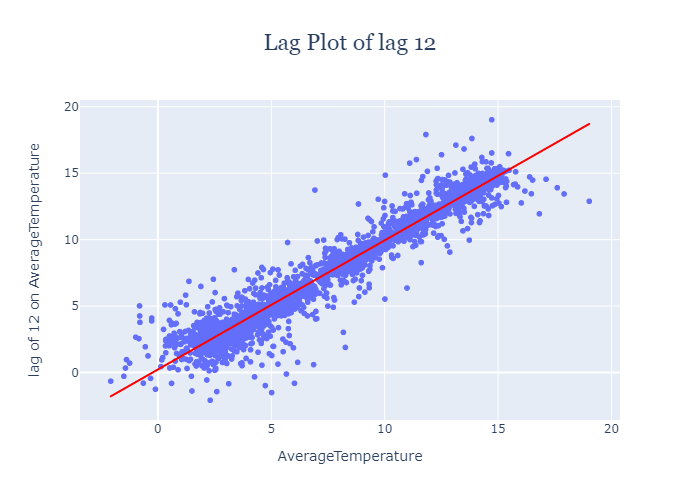

In [6]:
# This function will generate an Interactive Scatter Plot to show lags with Previous data
def lag_plot(lags=1): 
    x = df['AverageTemperature']
    y = df['AverageTemperature'].shift(lags)
    title = 'Lag Plot of lag ' + str(lags)
    fig = px.scatter(x=x,y=y,trendline='ols',trendline_color_override='red', title = title, 
                      labels={'x':'AverageTemperature','y':'lag of {} on AverageTemperature'.format(lags)})
    fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
    fig.show('png') 
    
lag_plot(12)

As per the above plot, Average temperature of a Month is highly Correlated with Average temparature of same Month of Previous year. That means if Average temparature of Previous Year July Month was around 15 degree celcius, then This Year Average temparature of July Month would be around 15 degree celcius. <br><br>
The above plot only describe the Lag correlation for K = 12. Now Let visualize an Autocorrelation Plot to identify correlation for upto 100 lags.

<br><br><br>

### ACF or Autocorrelation plots : 

Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelations for data values at varying time lags. <br>
It measures a set of current values against a set of past values and finds whether they correlate.<br>
It is the correlation of one-time series data to another time series data which has a time lag.<br>
It varies from +1 to -1.<br>
An autocorrelation of +1 indicates that if time series one increases in value the time series 2 also increases in proportion to the change in time series 1.<br>
An autocorrelation of -1 indicates that if time series one increases in value the time series 2 decreases in proportion to the change in time series 1.<br>

In [7]:
from statsmodels.tsa.stattools import acf, pacf

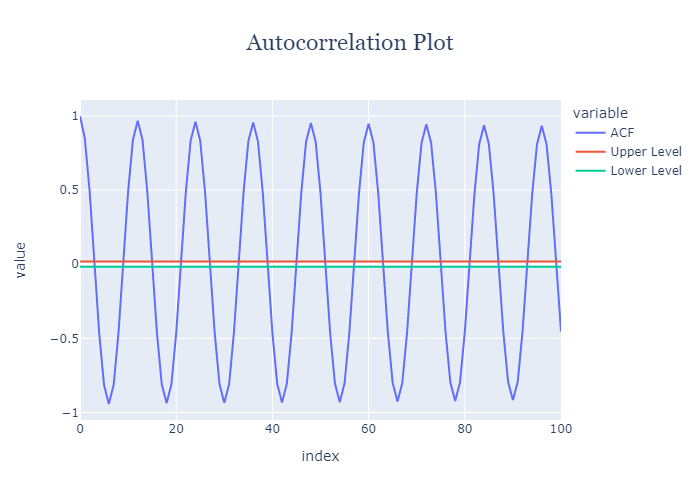

In [8]:
# Auto-Correlation Plot useful to analyze and visualize Correlation of data with its lags.
acf_df = pd.DataFrame({'ACF':acf(df['AverageTemperature'],nlags=100,fft=False)})
acf_df['Upper Level'] = 1.96 / 1.96 / (df.shape[0] ** 0.5 )
acf_df['Lower Level'] = - 1.96 / 1.96 / (df.shape[0] ** 0.5 )
fig = px.line(acf_df,title='Autocorrelation Plot')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

As per the Autocorrelation plot - <br>
> Lag with 12 has highest autocorrelation with correlation of 0.96 <br>
> For every lags with multiple of 12 has very high autocorrelation (>0.9), but it decreasing with 0.005 (almost) per increase of +12 lags. <br>
> Lag with 6 has highest negetive autocorrelation with correlation of -0.94 <br>
> For every lags with multiple of 12 after the 6 lags has very high negetive autocorrelation (<-0.9), but it decreasing with 0.004 (almost) per increase of +12 lags. <br>
> Lags with 1 and (12i + 1) or (12i - 1) has enough high autocorrelation with correlation around 0.8 <br>
> Lags with 1 and (12i + 1) or (12i - 1) after the 6 lags has enough high negetive autocorrelation with correlation around -0.8 <br>

<br><br><br>

### Trend Plot :
A trend Graph is a graph that is used to show the trends data over a period of time. It describes a functional representation of two variables (x , y). In which the x is the time-dependent variable whereas y is the collected data. <br><br>
<strong>Moving Averages :</strong> In statistics, a moving average is a calculation to analyze data points by creating a series of averages of different subsets of the full data set. It is also called a moving mean or rolling mean and is a type of finite impulse response filter. <br>
Here is the Trend Plot using Moving Average of 10 Years :

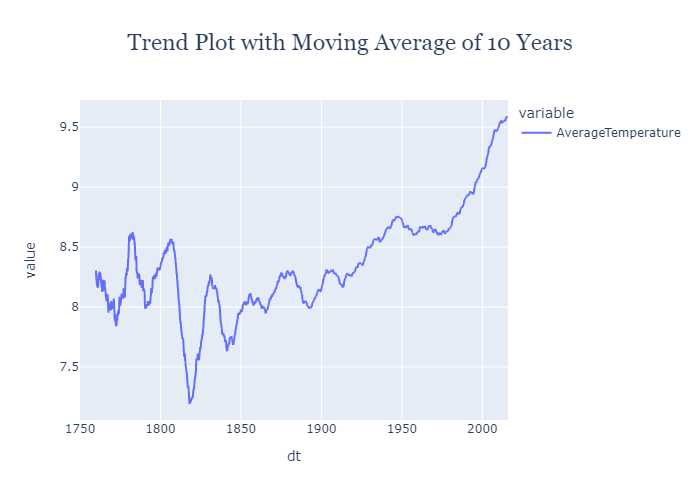

In [9]:
title='Trend Plot with Moving Average of 10 Years'
data = df['AverageTemperature'].rolling(window=12*10).mean()
fig = px.line(data,title=title)
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

As per the above Trend plot - 
> from 1750 to now, the trend looks upword <br>
> Hence, Global Warming and Temperature Rising happens and <br>
> From 1800 to 1813, Temperature Falls exponentially from 8.55 to 7.19 Celcius. Then <br>
> From 1813 to 1970 Temperature Rises from 7.19 to 8.61 Celcius. Then <br>
> From 1970 to 2010 Temperature Rises exponentially from 8.61 to 9.58 Celcius just within this 40 years, which is almost equals to 1 degree celcius as per every 10 Years Interval Average. 



<br><br><br>

### Seasonal Plot :
**What Is Seasonality?** <br>
Seasonality is a characteristic of a time series in which the data experiences regular and predictable changes that recur every calendar year. Any predictable fluctuation or pattern that recurs or repeats over a one-year period is said to be seasonal. <br>
A **seasonal plot** is similar to a time plot except that the data are plotted against the individual “seasons” in which the data were observed. This plot visualize the seasonality of the given Time Series.
<br><br>
**Here is the Seasonal Bar Plot to visualize the Average Temperature Per Month -**

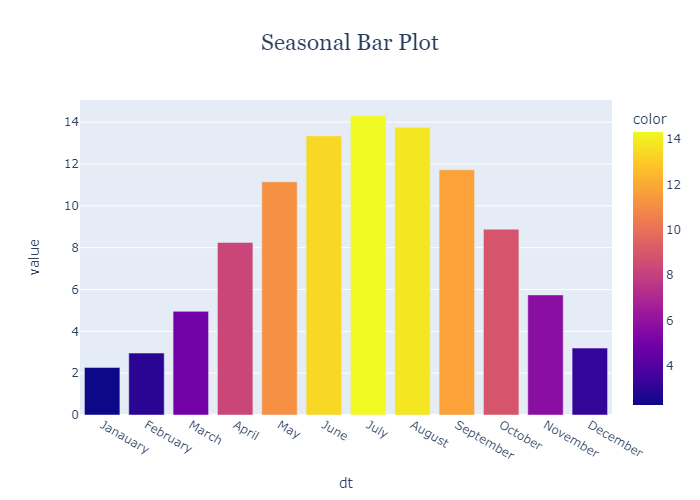

In [10]:
month = {1:'Janauary',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',
         8:'August',9:'September',10:'October',11:'November',12:'December'}
temp = df['AverageTemperature'].groupby(df['AverageTemperature'].index.month).mean()
temp.index = temp.index.map(month)
fig = px.bar(temp,color=temp,title='Seasonal Bar Plot')
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

As per the above Seasonal Bar Plot - 
> July is the hottest month followed by August, June. This months are belongs to Global Summer Season and <br>
> January is the Coldest followed by February and December. This months are belongs to Global Winter Season<br>
> March, April, May after Winter and September, October, November after Summer are generally falls under the category of not very hot, not very cold.

<br><br><br>

### Choropleth Map :
Choropleth Maps display divided geographical areas or regions that are coloured, shaded or patterned in relation to a data variable. This provides a way to visualise values over a geographical area, which can show variation or patterns across the displayed location. <br>
Here is the **Chloropleth Map of Average Temperature by Countries -**

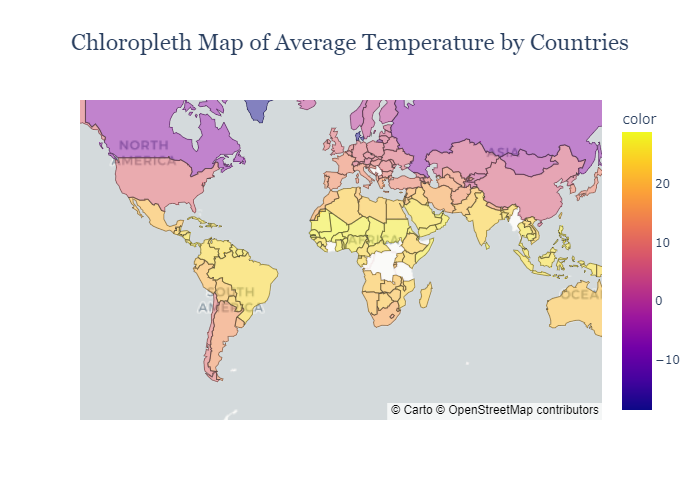

In [11]:
df_countries = pd.read_csv('datasets/GlobalLandTemperaturesByCountry.csv',parse_dates=['dt'],index_col='dt')
df_countries = df_countries[['AverageTemperature','Country']]

def usa(x):
    if x == 'United States':
        return 'United States of America'
    else:
        return x
df_countries['Country'] = df_countries['Country'].apply(usa)

import json
geo = json.load(open('datasets/countries.geo.json','r'))
country_id = {}
for feature in geo['features']:
    country_id[feature['properties']['name']] = feature['id']
df_countries['country_id'] = df_countries.Country.map(country_id)


locations = df_countries.groupby('country_id')['AverageTemperature'].mean().to_dict().keys()
data = df_countries.groupby('country_id')['AverageTemperature'].mean().to_dict().values()
data = np.around(list(data),2)
hover_name = df_countries.groupby('country_id')['Country'].unique()
hover_data = {'Average Temperature':data}
title = 'Chloropleth Map of Average Temperature by Countries'
fig = px.choropleth_mapbox(geojson=geo,locations=locations,color=data,hover_name=hover_name,hover_data=hover_data,
                           mapbox_style='carto-positron',zoom=0.35,opacity=0.5,title=title)
fig.update_layout(title={'font_family':'Georgia','font_size':23,'x':0.5})
fig.show('png')

As per the above Chloropleth Map,

> Countries near to the Equator are hottest Most Countries ( about more than 20 degree celcius Yearly Average Temperature ). India and South Asian Countries, Brazil and Middle of Both America, Arabia, North African Countries falls under this categories.<br>
> Countries near to the Pole are Coldest Most Countries ( about less than 0 degree celcius Yearly Average Temperature ).
Russia, Canada and Greenland falls under this category. <br>
> USA, China, Japan, Europe, Korea, Kazakhstan like countries are falls under the category of not very hot, not very cold. Yearly Average Temperature ranges in this countries generally from 5 to 12 degree celcius.

<br><br><br><br><br><br>

# <center> **Thank You**

<br><br><br><br><br>